# Pynams: A Python Package for Nominally Anhydrous Minerals
Here are some examples for how to process FTIR spectra to estimate hydrogen contents and perform basic diffusion modeling with pynams.  


## Get pynams and basic python scientific and plotting packages
For those new to python, I recommend installing it through [anaconda](https://www.continuum.io/downloads). pynams works with either python 2.7 or 3.

Once you have python, download [pynams](https://github.com/EFerriss/pynams) and install it by going into the Pynams folder on your command line and typing 'python setup.py install'. 

After that you should be able to follow along with the code below anywhere you can run a python script. I like [Jupyter notebooks](http://jupyter.org/) (this format) for quick things that I want to show people and [spyder](https://pythonhosted.org/spyder/) for more involved projects. Both come with anaconda. 

The first and seconds lines make plots show up correctly in a jupyter notebook.  
The third line will let us use some special plotting commands for fiddling with figures later on.  
The fourth line makes my python 2.7 code more compatible with python 3.

In [39]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
import matplotlib.pyplot as plt
from __future__ import print_function, division

# Spectra
Pynams was written to handle **CSV** files of raw transmission FTIR data, but has done ok with txt

In [40]:
import pynams
from pynams import Spectrum

### Here I'm pointing to example data within the pynams folder
FTIR_file_location = pynams.example_FTIR_file_location
spectrum_augite1 = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=268.)

### Here is an example of how to pass in data from a personal computer
### Mac people note there is no C at the beginning of your path
#FTIR_file_location = 'C:\\Users\\Ferriss\\Documents\\Code\\Pynams\\example_FTIR_spectra\\'
#spectrum_augite1 = Spectrum(fname='augite1', folder=FTIR_file_location, thickness_microns=268.)


## Plot spectra

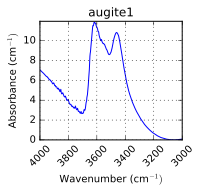

In [41]:
fig, ax = spectrum_augite1.plot_spectrum()

Next we'll plot two spectra on top of each other. 

You'll want those lines to look different. You can pass in a dictionary of style terms in through the keyword style (see example below). There are several premade style dictionaries in the pynams module styles, so we're going to import that too.

The keyword offset moves your spectrum up and down by the specified amount.

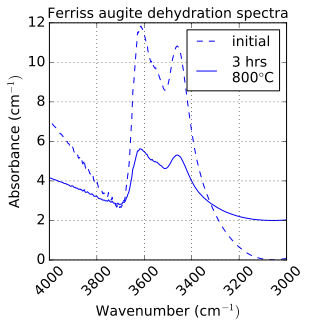

In [42]:
# Making second spectrum called spectrum2 the same way as spectrum above
spectrum_augite2 = Spectrum(fname = 'augite2', thickness_microns = 876.4, folder=FTIR_file_location)

# A larger plot with two spectra and a legend
from pynams import styles
fig, ax = spectrum_augite1.plot_spectrum(style=styles.style_initial, label='initial')
spectrum_augite2.plot_spectrum(axes=ax, style=styles.style_1, label='3 hrs\n800$\degree$C', offset=2.)
fig.set_size_inches(5, 5)

# the y-axis limits should be set to whatever is appropriate for your spectra
ax.set_ylim(0, 12.)

ax.set_title('Ferriss augite dehydration spectra', fontsize=14)
hleg = ax.legend(loc=1, fontsize=14) 

# change font sizes
# this line is why we imported matplotlib.pyplot at the beginning
plt.tick_params(axis='both', which='major', labelsize=14) 

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# Thicknesses
## Method 1: Input thickness directly, as above
## Method 2: Input the sample and infrared ray path (thickness direction)
This example uses data from [Ferriss et al. 2016](http://link.springer.com/article/10.1007/s00410-016-1262-8)

In [43]:
from pynams import Sample
Kunlun_diopside_K4 = Sample(length_a_microns=7000, length_b_microns=[2185, 2190, 2188, 2185, 2188],
                            length_c_microns=[1546, 1551, 1536, 1548, 1548])
folder=''.join((FTIR_file_location, 'KunlunDiopside_K4_initial\\'))
spectrum_diopside = Spectrum(fname='K4q_cdb01', folder=folder, sample=Kunlun_diopside_K4, raypath='b')
print(spectrum_diopside.thickness_microns)

2187.2


## Method 3: Estimate the thickness from SiO overtones - olivine only
This method is for transmission FTIR spectra and uses Eq 1 of Matveev and Stachel 2007. For reflectance spectra, see Wysoczanski and Tani 2006.    

In [44]:
spectrum_olivine = Spectrum(folder=FTIR_file_location, fname='olivine1')
spectrum_olivine.get_thickness_from_SiO()

360.34533783355886

# Guess the orientation of an olivine
Lemaire et al. 2004 Figure 1 shows typical O-H stretches and 2nd order Si-O overtones for FTIR spectra for olivine with light polarized in different directions. spectrum.orientation(), produces a plot zoomed in on the relevant Si-O peaks with labeled lines for the major peaks shown in the Lemaire figure. This example is probably oriented with the electric vector || c.

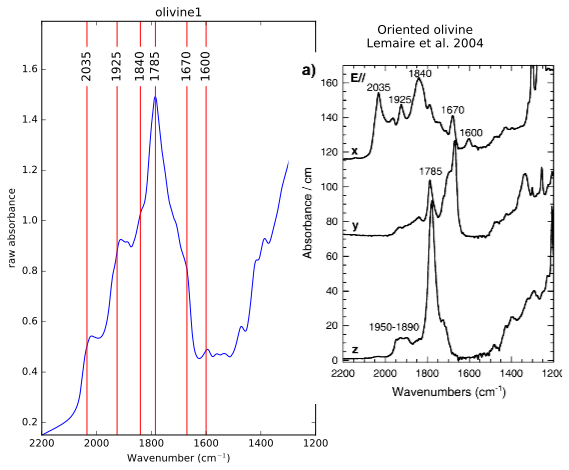

In [45]:
fig = spectrum_olivine.orientation()
fig.set_size_inches(8, 8)

# Baselines
The default is a line between wavenumbers 3200 and 3700 cm-1, but you can also make quadratic baselines (linetype='quadratic') or cubic splines (linetype='spline'; these can take awhile to run) and change the wavenumber range. Here are some examples:

## Default linear baseline

Making the default linear baseline.
Use Spectrum.make_baseline for other baselines.


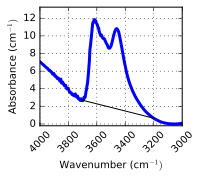

In [46]:
fig, ax = spectrum_augite1.plot_showbaseline()

## Two ways to make a quadratic line

The wavenumber range of the baseline is set by the keywords wn_high and wn_low, which default to 3700 and 3200 cm-1.

The keyword force_quadratic_though_wn will force a fit though quadratic line through the curve at that wavenumber or list of wavenumbers.

Or tell it how much to shift the quadrtic curve away from being a line using the curvature keyword. 

fitting x values: [ 3700.789  3500.     3399.943]
fitting y values: [ 2.69764925  8.84796269  6.48564925]


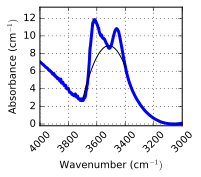

In [47]:
spectrum_augite1.make_baseline(force_quadratic_through_wn=3500, wn_low=3400, show_fit_values=True)
fig, ax = spectrum_augite1.plot_showbaseline()

fitting x values: [ 3700.789  3550.     3000.744]
fitting y values: [ 2.69764925  1.43307157  0.0765709 ]


(0, 15)

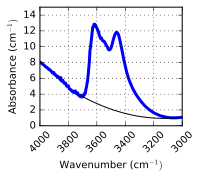

In [48]:
spectrum_augite1.make_baseline(curvature=0.7, wn_low=3000, show_fit_values=True, show_plot=False)
fig, ax = spectrum_augite1.plot_showbaseline(offset=1)
ax.set_ylim(0, 15)

## Baselines for noisy spectra
The keywords abs_smear_high and abs_smear_low will 'smear' the absorbance around the high and low baseline wavenumbers by fitting through the average absorbance near wn_high and wn_low. Higher abs_smears average over more wavenumbers

(0, 0.3)

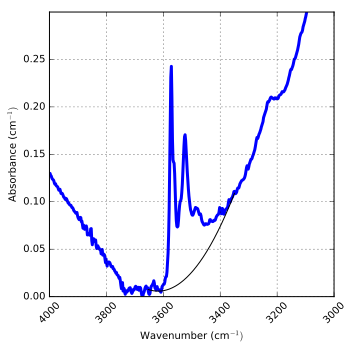

In [49]:
spectrum_noisy_olivine = Spectrum(folder=FTIR_file_location, fname='olivine4', thickness_microns=360.)
spectrum_noisy_olivine.make_baseline(wn_high=3655, abs_smear_high=10, wn_low=3350, abs_smear_low=10, curvature=0.03)
fig, ax = spectrum_noisy_olivine.plot_showbaseline()
fig.set_size_inches(6, 6)
ax.set_ylim(0, 0.3)

## Subtract the baseline

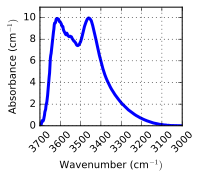

In [50]:
fig, ax = spectrum_augite1.plot_subtractbaseline()

## The area between the curve and the baseline

In [51]:
spectrum_augite1.get_area_under_curve();

augite1
area: 2743.3 /cm^2


## A very rough estimate of the water content
Defaults are phase='cpx', calibration='Bell', and scale_water (how much to multiply the resulting water concentration by to account for areas in spectra in different direction that weren't measured) of 3.

These results are not really to be trusted, but will give you a very rough estimate. See, e.g., Rossman 2006 review.

The reported errors are based *only* on propagated error from the absorption coefficients and do not include the large (30%?) uncertainties associated with baseline choice and the potentially even larger errors associated with using unpolarized radiation (Withers 2013).

In [52]:
spectrum_augite1.water(printout=True, phase='cpx', calibration='Bell')
spectrum_noisy_olivine.water(printout=True, phase='ol', calibration='Withers', scale_water=2.1);

augite1
water: 386.9+/-17.5 ppm H2O
 *3 = 1160.8+/-52.4 ppm H2O
olivine4
water: 1.6+/-0.1 ppm H2O
 *2.1 = 4.8+/-0.2 ppm H2O



# Profiles

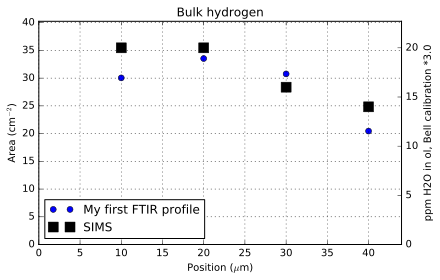

In [53]:
from pynams import Profile

# make the profile
# fnames and folder described for spectra above.
# If length_microns is not included, the length of the profile is assumed to be 
# the longest value in positions_microns + 10%
profile = Profile(profile_name='My first FTIR profile', 
                  fnames=['olivine1', 'olivine2', 'olivine3', 'olivine4'],  
                  folder=FTIR_file_location, 
                  thicknesses_microns=200., 
                  positions_microns=[10., 20., 30., 40.])

# make quadratic baselines. Keywords are the same as in spectrum.make_baseline() above
profile.make_baselines(wn_low=3100, wn_high=3600., force_quadratic_through_wn=3300)
# profile.plot_showbaselines() # uncomment this out if you want to look at the baselines

# plot the profile area
fig, ax, ax_water = profile.plot_area_profile(show_water_ppm=True, centered=False, phase='ol',
                                              calibration='Bell', scale_water=3.)

# Now let's add your lovely SIMS data
# Note that I'm plotting on ax_water. If you use ax, the SIMS data plots on the left axis. 
SIMS_data = [20, 20, 16, 14]
ax_water.plot(profile.positions_microns, SIMS_data, 'sk', markersize=10, label='SIMS')
ax.legend(loc=3);


## Average all the spectra across the profile

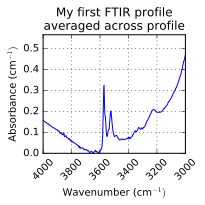

In [54]:
avespec = profile.average_spectra()
avespec.get_thickness_from_SiO()
fig, ax = avespec.plot_spectrum()

## Save a spectrum
This function defaults to saving the absorbance per cm in the .txt format preferred by the [PULI database](http://puli.mfgi.hu/), but if you just want to save a synthetic spectrum, e.g., the result of averaging the profile above, you can change the defaults so it looks like a regular CSV that you can load whenever you want it later.



In [55]:
avespec.fname = 'testsave'
avespec.save_spectrum(folder=FTIR_file_location)
avespec.save_spectrum(folder=FTIR_file_location, delim=',', file_ending='.CSV', raw_data=True)


Saved pynams\example_FTIR_spectra\testsave-per-cm.txt
Saved pynams\example_FTIR_spectra\testsave.CSV


## Thickness across an olivine profile

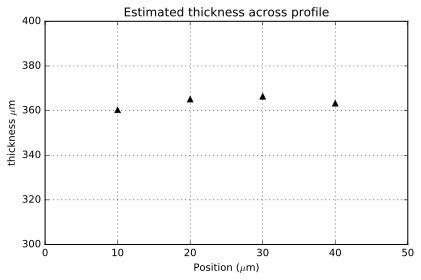

In [56]:
profile.get_thicknesses_from_SiO()
fig, ax, ax_water = styles.plot_area_profile_outline(show_water_ppm=False)
ax.set_ylabel('thickness $\mu$m')
ax.plot(profile.positions_microns, profile.thicknesses_microns, '^k')
ax.set_ylim(300, 400)
ax.set_xlim(0, 50)
ax.set_title('Estimated thickness across profile');

# Handling multiple baselines
Perhaps you want to make a baseline and then not have to re-make it every time you want to plot the areas. Perhaps you are using different baselines to come up with rough peak-specific area profiles. Perhaps you want a sense for the range of the calculated area given different baselines. You need a way to handle multiple sets of baselines.

## Save a baseline

Saved pynams\example_FTIR_spectra\augite1-baseline.CSV


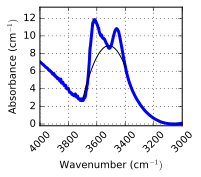

In [57]:
spectrum_augite1.make_baseline(wn_low=3400, force_quadratic_through_wn=3500)
spectrum_augite1.plot_showbaseline()
spectrum_augite1.save_baseline(folder=FTIR_file_location)

Saved pynams\example_FTIR_spectra\augite1-linearbaseline.CSV


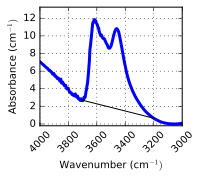

In [58]:
# make a linear baseline and save it under a different name
spectrum_augite1.make_baseline()
spectrum_augite1.plot_showbaseline()
spectrum_augite1.save_baseline(folder=FTIR_file_location, baseline_ending='-linearbaseline.CSV')

## Get saved baselines

Got baseline pynams\example_FTIR_spectra\augite1-baseline.CSV


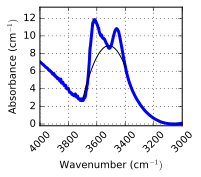

In [59]:
spectrum_augite1.get_baseline(folder=FTIR_file_location)
fig, ax = spectrum_augite1.plot_showbaseline()

Got baseline pynams\example_FTIR_spectra\augite1-linearbaseline.CSV


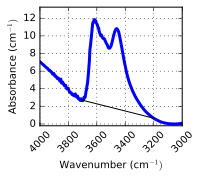

In [60]:
spectrum_augite1.get_baseline(folder=FTIR_file_location, baseline_ending='-linearbaseline.CSV')
fig, ax = spectrum_augite1.plot_showbaseline()

## Save and retrieve all baselines in a profile

In [61]:
profile.save_baselines(folder=FTIR_file_location)

Saved pynams\example_FTIR_spectra\olivine1-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine2-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine3-baseline.CSV
Saved pynams\example_FTIR_spectra\olivine4-baseline.CSV


In [62]:
profile.get_baselines(folder=FTIR_file_location)

Got baseline pynams\example_FTIR_spectra\olivine1-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine2-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine3-baseline.CSV
Got baseline pynams\example_FTIR_spectra\olivine4-baseline.CSV


# Peak fitting
So you want to make peak-specific profiles. 

The easiest way to do that is to make and save different baselines, one under each peak or set of peaks that you are interested in, and do profile.get_baselines() before each plotting step. That works remarkably well if you have have nice discrete peaks, but not so well if your peaks overlap with each other.

I am unfortunately not aware of any good peak fitting programs currently available in python. The peak fitting program that I use is an open-source program available for Matlab and Octave called [peakfit.m](https://terpconnect.umd.edu/~toh/spectrum/InteractivePeakFitter.htm#command). Another option I am aware of is OpticalFit, which was developed by and is available from CSIRO Australia.

My strategy is as follows:  
1. Make and save the baseline using pynams.
2. Perform a peak fitting routine on the baseline-subtracted spectrum in Matlab using peakfit.m, usually called through this [helper function](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/FTIR_peakfit_loop.m) that loops through spectra fnames and allows setting individual peak widths and heights.
3. At the end of FTIR_peakfit_loop.m call another matlab function to [save the fit](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/savefit.m) details as fname-peakfit.CSV
4. Back in python, retrieve the saved peakfit information using pynams.Spectrum.get_peakfit()

## Locate peaks

peaks found at the following wavenumbers:
[ 3245.663  3459.726  3546.509  3629.434]
change sensitivity to find more or fewer peaks


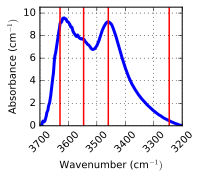

In [63]:
spectrum_augite1.make_baseline(curvature=0.1)
spectrum_augite1.find_peaks(sensitivity=20);

## Get peakfit information from a file
You can make these files manually and fiddle with the numbers until you have a fit you're happy with.

### Required columns in fname-peakfit.CSV:  
Column 1: peak wavenumber positions in cm-1   
Column 2: peak heights in cm-1  
Column 3: peak widths in cm-1

Got baseline pynams\example_FTIR_spectra\KunlunDiopside_K4_initial\K4q_cdb01-baseline.CSV
Got peak info from pynams\example_FTIR_spectra\KunlunDiopside_K4_initial\K4q_cdb01-peakfit.CSV


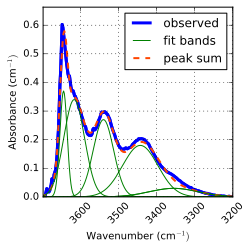

In [64]:
spectrum_diopside.get_baseline()
spectrum_diopside.get_peakfit()
fig, ax = spectrum_diopside.plot_peakfit()
fig.set_size_inches(4, 4)

## Handling multiple possible peakfits
get_peakfit has a keyword peak_ending (default = '-peakfit.CSV') the functions the same way baseline_ending does for baselines.

## Peak-specific profiles

In [ ]:
profile_diopside = Profile()

# Diffusion
## Get H diffusivities from the literature

In [65]:
# import library of diffusities from the literature
# from pynams.diffusion import literaturevalues as dlib # this is the long way to do the import
from pynams import dlib

# proton-polaron fast diffusion mechanism in San Carlos olivine hydration
# diffusivities from Kohlstedt and Mackwell 1998, here KM98
olivine_fast_mechanism = dlib.KM98_fast

# What is the diffusivity in all available directions at a given temperature?
celsius = 900
print(celsius, 'C')

# whatIsD returns a list of diffusivities || [100], || [010], || [001], and then unoriented.
# The values in the list are None if there is no data || to that direction.
# The available diffusivities are automatically printed unless printout is set to False.
print('San Carlos olivine proton-polaron diffusion')
diffusivity_list = olivine_fast_mechanism.whatIsD(celsius=celsius)

# specifying an orientation returns a single value
# x = a = [100]; y = b = [010]; z = c = [001]
Dfast = olivine_fast_mechanism.whatIsD(celsius=celsius, orient='a', printout=False)
print('D || [100] =', '{:.2f}'.format(Dfast), 'm2/s fast mechanism')

Dslow = dlib.KM98_slow.whatIsD(celsius=celsius, orient='x', printout=False)
print('D || [100] =', '{:.2f}'.format(Dslow), 'm2/s slow mechanism')

# pnav = Padron-Navarta et al 2014
Dmg = dlib.pnav_Mg.whatIsD(celsius=celsius, orient='u', printout=False)
print('D for [Mg] =', '{:.2f}'.format(Dmg), 'm2/s in unoriented Fe-free forsterite')

Dti = dlib.pnav_Ti.whatIsD(celsius=celsius, printout=False) # returning full list
print('D for [Ti] =', '{:.2f}'.format(Dti[3]), 'm2/s in unoriented Fe-free forsterite')

Dsi = dlib.pnav_Si.whatIsD(celsius=celsius, printout=False)
print('D for [Si] =', '{:.2f}'.format(Dsi[3]), 'm2/s in unoriented Fe-free forsterite')

900 C
San Carlos olivine proton-polaron diffusion
|| x
log10 D at  900 C:  -10.1  in m2/s
|| y
log10 D at  900 C:  -11.6  in m2/s
|| z
log10 D at  900 C:  -11.4  in m2/s
D || [100] = -10.13 m2/s fast mechanism
D || [100] = -14.00 m2/s slow mechanism
D for [Mg] = -13.51 m2/s in unoriented Fe-free forsterite
D for [Ti] = -14.12 m2/s in unoriented Fe-free forsterite
D for [Si] = -17.30 m2/s in unoriented Fe-free forsterite


## Add new data to the diffusivity library

In [66]:
from pynams import Diffusivities
#help(Diffusivities)

# Input data as log (base 10) of the diffusivity in m2/s
# Assuming isotropic diffusion
my_new_diffusion_data = Diffusivities(description = 'Kunlun diopside bulk H', 
                                      celsius_all = [816., 904., 904., 1000.],
                                      logD_all = [-13.6, -13.35, -13.35, -12.9],)

my_new_diffusion_data.whatIsD(celsius=800., orient='x');
my_new_diffusion_data.whatIsD(celsius=1000., orient='x');
my_new_diffusion_data.whatIsD(celsius=1200., orient='x');

log10 D at  800.0 C:  -13.7  in m2/s
log10 D at  1000.0 C:  -13.0  in m2/s
log10 D at  1200.0 C:  -12.4  in m2/s


## Draw Arrhenius diagrams

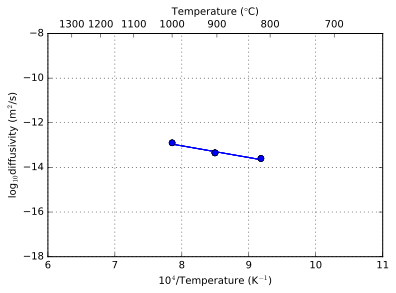

In [67]:
from pynams.diffusion import arrhenius
fig, ax, legend_handle = arrhenius.Arrhenius_outline()
my_new_diffusion_data.plotD(axes=ax)

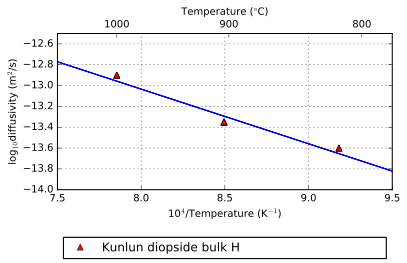

In [68]:
fig, ax, legend_handle = arrhenius.Arrhenius_outline(make_legend=True, top=-12.5, 
                                                     bottom=-14, high=9.5, low=7.5)
my_new_diffusion_data.plotD(axes=ax, extrapolate_line=True, 
                            style=styles.style_points1, legend_add=True,
                            legend_handle=legend_handle, lower_legend_by=-0.4)

# 1D diffusion profiles
## 1D diffusion in a thin slab
See Eq 4.18 in Crank, 1975. C is the concentration

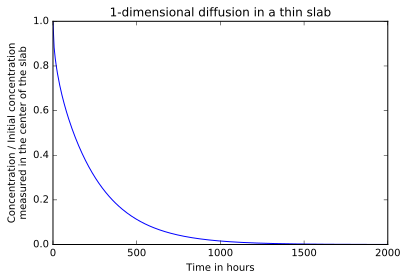

In [69]:
from pynams.diffusion import models
time_hours, c_over_c0 = models.diffusionThinSlab(log10D_m2s=-14., thickness_microns=300., 
                                                 max_time_hours=2000, timesteps=300)
plt.plot(time_hours, c_over_c0)
plt.xlabel('Time in hours')
plt.ylabel('Concentration / Initial concentration\nmeasured in the center of the slab')
plt.title('1-dimensional diffusion in a thin slab');

## 1D diffusion in a profile
Simple analytic solutions assuming diffusivity is independent of the diffusing species. 

Error functions (the default) are usually preferred for the early stages of diffusion, and the infinite sum (erf_or_sum='infsum') more accurately represents diffusion at later stages (Crank 1975, Section 2.1)

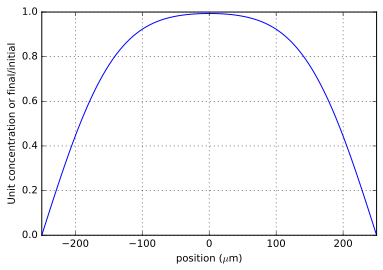

In [70]:
fig, ax, x_data, y_data = models.diffusion1D(length_microns=500., log10D_m2s=-12., time_seconds=3600.)

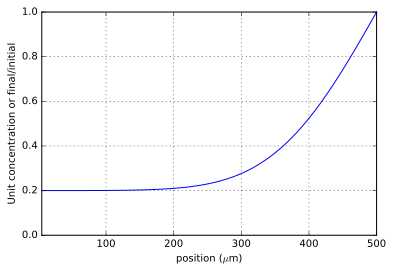

In [71]:
fig, ax, x_data, y_data = models.diffusion1D(length_microns=500, log10D_m2s=-12, time_seconds=2*3600,
                                             init=0.2, fin=1., symmetric=False, centered=False)

In [72]:
fig, ax, x_data, y_data = models.diffusion1D(length_microns=500., log10D_m2s=-12., 
                                             time_seconds=2*3600., show_plot=False)
print('Slight change in the center. Fraction of initial concentration:')
print(max(y_data))

Slight change in the center. Fraction of initial concentration:
0.925474258844


## Plot 1D diffusion profiles on top of your data
The plot_diffusion method combines plot_area_profile() with diffusion1D() and includes most of the same keywords. 

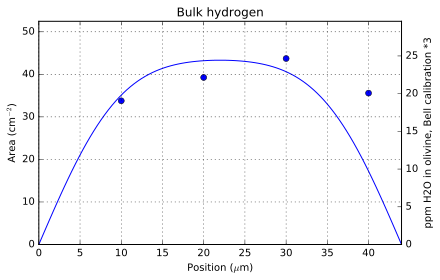

In [73]:
profile.make_baselines(curvature=0.1, wn_low=3100)
fig, ax, ax_water = profile.plot_diffusion(time_seconds=60*5, log10D_m2s=-13, centered=False)

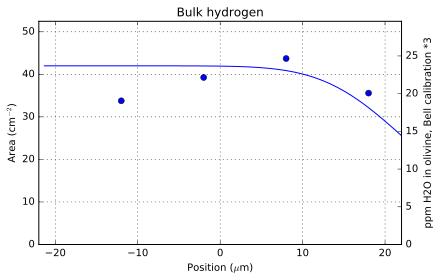

In [74]:
fig, ax, ax_water = profile.plot_diffusion(time_seconds=60*5, log10D_m2s=-13, centered=True, 
                                           fin=0.6, symmetric=False, maximum_value=42)

# Fit 1D diffusion data
Given time, fit the diffusivity

initial: 43.72+/-0
final: 0.00+/-0
log10D m2/s: -14.88+/-0.28
hours: 1.00+/-0


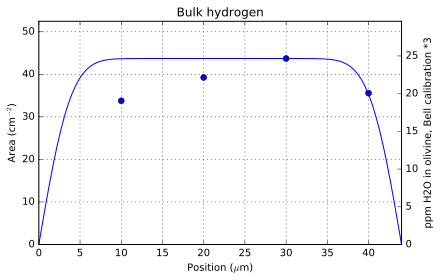

In [75]:
log10D, initial, residual_sum_of_squares = profile.fitD(vary_initial=False, 
                                                        varyD=True, 
                                                        vary_time=False, 
                                                        time_seconds=3600.,)

And given an initial=the maximum area (the default) and some fixes diffusivity, fit the time and the final concentration.

initial: 43.72+/-0
final: 32.22+/-6.38
log10D m2/s: -14.88+/-0
hours: 22.61+/-22.04


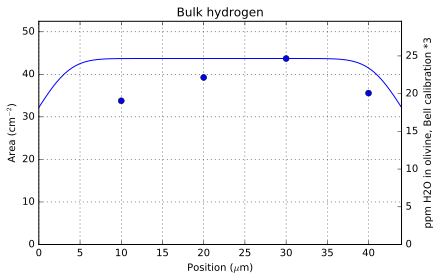

In [76]:
log10D, initial, residual_sum_of_squares = profile.fitD(vary_initial=False, 
                                                        final_unit_value=0.2, 
                                                        vary_final=True,
                                                        varyD=False, 
                                                        vary_time=True, 
                                                        log10Dm2s=-14.88)

# Groups of profiles
A 'WholeBlock' in pynams is a collection of up to 3 profiles measured on the same sample. These profiles can be measured through an uncut block (the original 'whole block') or on a polished wafer with 2 orthogonal profiles. 

First make each of the three profiles, and then group them together as a WholeBlock. Most of the methods that apply to profiles (e.g., make_baseline) also apply to WholeBlocks.